## Plotting of the main results
This notebook can be used to plot the results of the song and vibration analysis, mainly those considering the amount of the signal types. Following plots can be created:
 - raster plots
 - PSTHs
 - boxplots for the changes in the signal amounts 
 - sankey diagrams for the changes in the signal amounts
 - boxplots for all signal changes 
This notebook relies on the data created using the notebook "analyze_song_vibration.ipynb".

Author: Bjarne Schultze <br>
Last modified: 29.11.2024

In [1]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pdf2image import convert_from_path

import modules.data_handling_utils as dutils
import modules.plotting_utils as myplt

plt.style.use('./plotstyle_bjarne.mplstyle')

##### Preparations

In [2]:
# Select which plots should be created
overviews = False
presentation_plots = False
report_plots = True

# Choose an experimental group
exp_grp = "vMS12-SS3"

# Set yticks for the boxplots with global signal changes
yticks_dict = {"TN1A":[-80, -40, 0, 40], "pIP10": [0, 500, 1000], "vMS12-SS3":[-150, -100, -50, 0, 50], "vPR13":[-100, 0, 100, 200, 300]}
yticks_glob_changes = yticks_dict[exp_grp]

In [3]:
# Define colors
vib_col = to_rgb("#04A83D")   # '#46A81F'
pulse_col = to_rgb("#ff0000")  # '#5D11AD' 
sine_col = to_rgb("#2d7cff")  # '#F07236' 
sine_col_light = to_rgb("#78CEFF")
pulse_col_light = to_rgb("#FF776F")
vib_col_light = to_rgb("#7DD189")

In [4]:
# Read the calibration table for the light intensity
if exp_grp == "pIP10":    # For the pIP10 protocol
    with open("./accessory_files/opto_calibration_120_5.txt") as f:
        lines = f.readlines()
    opto_calib = np.sort(np.array([ txt.removesuffix('\n').split(',') for txt in lines ]).astype('float'), axis=0)
    stim_len = 5
else:       # For the normal protocol (all other conditions)
    with open("./accessory_files/opto_calibration_26_4.txt") as f:
        lines = f.readlines()
    opto_calib = np.sort(np.array([ txt.removesuffix('\n').split(',') for txt in lines ]).astype('float'), axis=0)
    stim_len = 4

##### Extract and prepare data

In [152]:
# Load the results from the analysis of the annotations 
datadict = dutils.read_hdf_to_dict(f"../additional_files/{exp_grp}_results.hdf5")
# Get number of experiments
number_exp = datadict["male/all_changes_cntd"].shape[0]
number_mf_exp = datadict["male_female/all_changes_cntd"].shape[0]

# print(np.array(list(datadict.keys())))

In [153]:
## Extract the data from the data dictionary read from the results file

# Get the raster matrices
time_vec = datadict["male_female/raster_mat_time"]
r_mat_p_mf = datadict["male_female/raster_mat_pulse"]
r_mat_s_mf = datadict["male_female/raster_mat_sine"]
r_mat_v_mf = datadict["male_female/raster_mat_vibration"]

r_mat_p = datadict["male/raster_mat_pulse"]
r_mat_s = datadict["male/raster_mat_sine"]
r_mat_v = datadict["male/raster_mat_vibration"]

# Calculate PSTHs from the raster matrices (number of trials with signal divided by number of all trials)
hist_p = np.mean((r_mat_p > 0).astype('int'), axis=0)
hist_s = np.mean((r_mat_s > 0).astype('int'), axis=0)
hist_v = np.mean((r_mat_v > 0).astype('int'), axis=0)

hist_p_mf = np.mean((r_mat_p_mf > 0).astype('int'), axis=0)
hist_s_mf = np.mean((r_mat_s_mf > 0).astype('int'), axis=0)
hist_v_mf = np.mean((r_mat_v_mf > 0).astype('int'), axis=0)

# Get the change in signal amounts per stimulus intensity
fi_signal_diff_idx = np.array(datadict["male/fi_signal_diff_signal_index"], dtype="U5")
p_counts_grp = datadict["male/fi_signal_diff"][fi_signal_diff_idx == "pulse", :]
sine_counts_grp = datadict["male/fi_signal_diff"][fi_signal_diff_idx == "sine", :]
vib_counts_grp = datadict["male/fi_signal_diff"][fi_signal_diff_idx == "vib", :]

fi_signal_diff_idx = np.array(datadict["male_female/fi_signal_diff_signal_index"], dtype="U5")
p_counts_grp_mf = datadict["male_female/fi_signal_diff"][fi_signal_diff_idx == "pulse", :]
sine_counts_grp_mf = datadict["male_female/fi_signal_diff"][fi_signal_diff_idx == "sine", :]
vib_counts_grp_mf = datadict["male_female/fi_signal_diff"][fi_signal_diff_idx == "vib", :]

# Get the stimulus volts
stim_volts = datadict["male/raster_mat_stimuli"]
stim_volts_mf = datadict["male_female/raster_mat_stimuli"]

# Get the changes in signal amounts across stimulus intensities
global_signal_diff_index_mf = datadict["male_female/global_signal_diff_index"]
p_diff_global_mf = datadict["male_female/global_signal_diff"][global_signal_diff_index_mf == "pulse", :]
s_diff_global_mf = datadict["male_female/global_signal_diff"][global_signal_diff_index_mf == "sine", :]
v_diff_global_mf = datadict["male_female/global_signal_diff"][global_signal_diff_index_mf == "vib", :]

global_signal_diff_index = datadict["male/global_signal_diff_index"]
p_diff_global = datadict["male/global_signal_diff"][global_signal_diff_index == "pulse", :]
s_diff_global = datadict["male/global_signal_diff"][global_signal_diff_index == "sine", :]
v_diff_global = datadict["male/global_signal_diff"][global_signal_diff_index == "vib", :]

# Get the counts of all signal type changes
cnt_chg_combi_srt_mf = datadict["male_female/all_changes_cntd"]
cnt_chg_labels_mf = datadict["male_female/all_changes_cntd_index"]
cnt_chg_labels_mf = np.array([ cnt_chg_labels_mf[ilab, :] for ilab in range(0, cnt_chg_labels_mf.shape[0], 2)])

cnt_chg_combi_srt = datadict["male/all_changes_cntd"]
cnt_chg_labels = datadict["male/all_changes_cntd_index"]
cnt_chg_labels = np.array([ cnt_chg_labels[ilab, :] for ilab in range(0, cnt_chg_labels.shape[0], 2)])

In [154]:
# Create a color dictionary for the signal types
color_dict = {'Pulse':[pulse_col_light,pulse_col], 'Sine':[sine_col_light,sine_col], 'Vib':[vib_col_light,vib_col], 'None':[to_rgb("#737373"), (0,0,0)]}
# Define a color order for the counts of all signal changes
colors_order = np.vstack([ color_dict[cnt_chg_labels[i,1]] for i in range(0, cnt_chg_labels.shape[0]) ]).tolist()
# Create corresponding x-ticklabels
xtick_labels = cnt_chg_labels[:, 0]
xtick_vals = np.arange(1.5, cnt_chg_labels.shape[0]*2 + 1.5, 2)

In [155]:
# Prepare the sankey diagrams using the raster matrices
poss_evt_chgs, evt_change_cnt, col_sankey_boxes, col_sankey_links = myplt.prep_sankey_from_mat([r_mat_p, r_mat_s, r_mat_v], 
                                                                                     time_vec, ["black", pulse_col, sine_col, vib_col], 
                                                                                     stim_len=stim_len)

poss_evt_chgs_mf, evt_change_cnt_mf, col_sankey_boxes_mf, col_sankey_links_mf = myplt.prep_sankey_from_mat([r_mat_p_mf, r_mat_s_mf, r_mat_v_mf], 
                                                                                     time_vec, ["black", pulse_col, sine_col, vib_col], 
                                                                                     stim_len=stim_len)

##### Load the test results

In [156]:
# Load the results of the Wilcoxon Signed Rank tests against zero for the count changes upon stimulation
test_res = pd.read_csv("E:/MT/additional_files/test_results_global_changes.csv")
# Extract the p values of the current condition and compare to the threshold
alpha_threshold = 0.05
pvals = test_res.loc[test_res["group"] == exp_grp, "pvalue"].values
effects = [ p < alpha_threshold for p in pvals ]

# Load the test results of the Wilcoxon Signed Rank tests for all possible signal changes from prior to during stimulation
test_res_all_chgs = pd.read_csv("E:/MT/additional_files/test_results_all_changes.csv")

# Compare the p-values to the alpha threshold to determine significance 
effects_all_chgs_m = test_res_all_chgs.loc[np.logical_and(test_res_all_chgs["condition"]=="m", test_res_all_chgs["group"]==exp_grp), "pvalue"].to_numpy() < alpha_threshold
effects_all_chgs_mf = test_res_all_chgs.loc[np.logical_and(test_res_all_chgs["condition"]=="mf", test_res_all_chgs["group"]==exp_grp), "pvalue"].to_numpy() < alpha_threshold

##### Raster plots and PSTHs

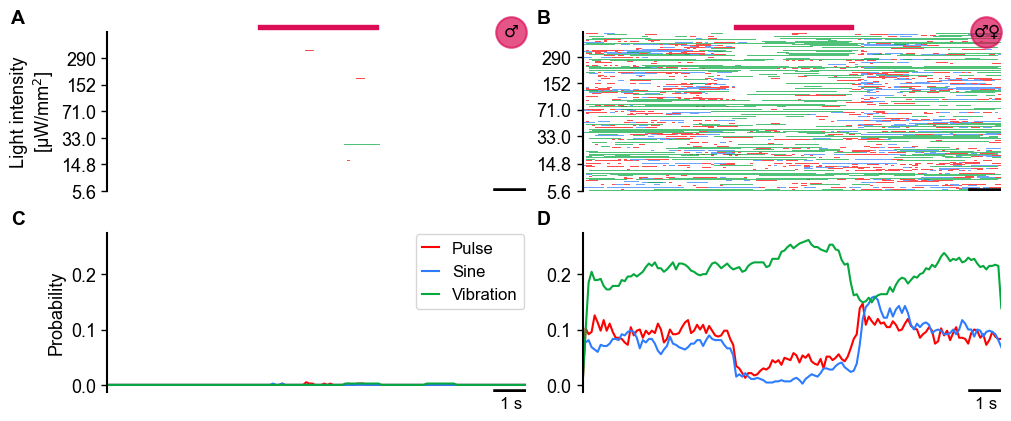

In [157]:
if report_plots:
    # Create tiled layout with specific arrangement
    fig, ax = plt.subplots(2, 2, figsize=(10,4.1))
    ax = ax.flatten()

    # Solitary male condition (raster: top, PSTH: bottom)
    myplt.raster_plot([r_mat_s,r_mat_p,r_mat_v], time_vec, stim_volts, 
                    labels=['Sine','Pulse','Vibrations'], colors=[sine_col,pulse_col,vib_col], ax=ax[0], legend_off=True, 
                    stim_watts=opto_calib[:,1], stim_period=[0,stim_len], alpha=0.7)
    myplt.psth_plot(time_vec, [hist_p,hist_s,hist_v], [pulse_col, sine_col, vib_col], 
                    ['Pulse','Sine','Vibration'], ax=ax[2], stim_period=[0,stim_len], 
                    stim_bar=False, legend_off=False)

    # Male-female condition (raster: top, PSTH: bottom)
    myplt.raster_plot([r_mat_s_mf,r_mat_p_mf,r_mat_v_mf], time_vec, stim_volts_mf, 
                    labels=['Sine','Pulse','Vibrations'], colors=[sine_col,pulse_col,vib_col], ax=ax[1], legend_off=True, 
                    stim_watts=opto_calib[:,1], stim_period=[0,stim_len], alpha=0.7)
    myplt.psth_plot(time_vec, [hist_p_mf,hist_s_mf,hist_v_mf], [pulse_col, sine_col, vib_col], 
                    ['Pulse','Sine','Vibration'], ax=ax[3], legend_off=True, 
                    stim_period=[0,stim_len], stim_bar=False)

    # Make y limits equal for the lower subplots and add a bar for the stimulation to the upper ones
    myplt.equal_axlims(ax[2:])
    myplt.add_stim_bar(ax[:2], stim_period=[0,stim_len])

    # Replace the x axes by scale bars
    myplt.axis_to_scale(ax[0], None, fontsize=12)
    myplt.axis_to_scale(ax[1], None, fontsize=12)
    myplt.axis_to_scale(ax[2], "s", fontsize=12, txt_offset=0.007)
    myplt.axis_to_scale(ax[3], "s", fontsize=12, txt_offset=0.007)

    # Remove the ticklabels for upper plots (x) and right plots (y)
    ax[0].set_xticklabels([])
    ax[1].set_xticklabels([])

    # Get current y labels
    ylabels_new0 = ax[0].get_yticklabels()
    ylabels_new1 = ax[1].get_yticklabels()
    # Remove trailing zeros
    _ = [ ylbl.set_text(round(float(ylbl.get_text()))) for ylbl in ylabels_new0 if float(ylbl.get_text()) >= 100 ]
    _ = [ ylbl.set_text(round(float(ylbl.get_text()))) for ylbl in ylabels_new1 if float(ylbl.get_text()) >= 100 ]
    # Set changed y labels
    ax[0].set_yticklabels(ylabels_new0)
    ax[1].set_yticklabels(ylabels_new1)

    # Label plots
    ax[2].set_ylabel('Probability')
    ax[0].set_ylabel(r"Light intensity" + "\n" + r"[µW/mm$^2$]")

    # Set the subpot titles
    ax[0].set_title("A", x=-0.23, y=1.0, fontsize=14)
    ax[1].set_title("B", x=-0.11, y=1.0, fontsize=14)
    ax[2].set_title("C", x=-0.23, y=1.0, fontsize=14)
    ax[3].set_title("D", x=-0.11, y=1.0, fontsize=14)

    # Add pictograms showing the experimental condition
    myplt.add_condition_pictogram(ax[0], "m", x=ax[0].get_xlim()[-1] - 0.5, y=ax[0].get_ylim()[-1])
    myplt.add_condition_pictogram(ax[1], "mf", x=ax[1].get_xlim()[-1] - 0.5, y=ax[1].get_ylim()[-1])

    # Save the figure
    # fig.savefig(f"../figures_wip/{exp_grp}/{exp_grp}_psth_raster.pdf")

##### Boxplots for the global signal amount changes and the changes in the number of signal changes

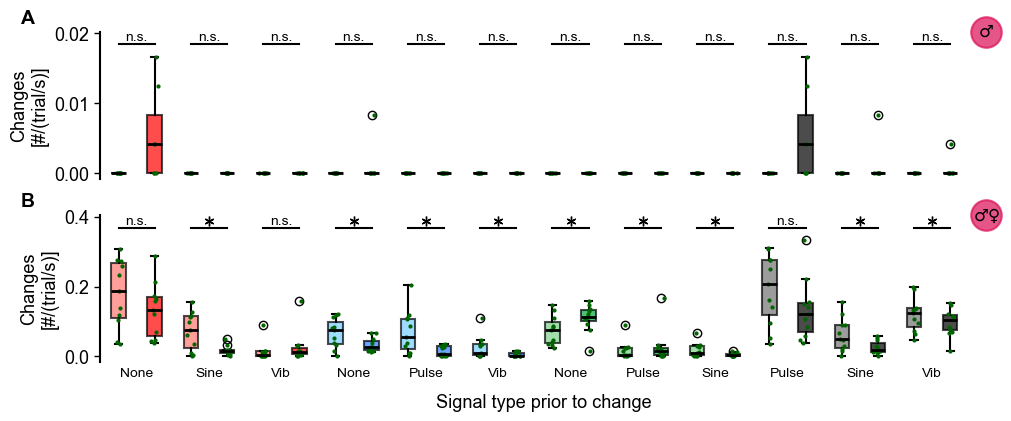

In [123]:
if report_plots:
    # Create a new figure
    fig8, ax8 = plt.subplots(2, 1, figsize=(10,4.1))
    # Plot the change counts as boxplots
    myplt.boxplot_dp(cnt_chg_combi_srt, markersize=2, ax=ax8[0], boxcolor=colors_order, markercolor="darkgreen", boxwidth=0.4)
    myplt.boxplot_dp(cnt_chg_combi_srt_mf, markersize=2, ax=ax8[1], boxcolor=colors_order, markercolor="darkgreen", boxwidth=0.4)
    # Add significance info
    myplt.add_significance_stars(ax8[1], effects_all_chgs_mf.tolist(), xtick_vals, width=1)
    myplt.add_significance_stars(ax8[0], effects_all_chgs_m.tolist(), xtick_vals, width=1)

    # Add alibi-dots 
    ax8[0].plot(1, 0, color=pulse_col, label="Pulse", linewidth=4)
    ax8[0].plot(1, 0, color=sine_col, label="Sine", linewidth=4)
    ax8[0].plot(1, 0, color=vib_col, label="Vibration", linewidth=4)
    ax8[0].plot(1, 0, color="black", label="None", linewidth=4)

    # Label the plot
    ax8[0].set_ylabel("Changes\n[#/(trial/s)]")
    ax8[1].set_ylabel("Changes\n[#/(trial/s)]")
    ax8[1].set_xlabel("Signal type prior to change", labelpad=10)
    ax8[1].set_xticks(xtick_vals, xtick_labels, fontsize=10)
    ax8[0].set_xticks(xtick_vals, [])
    ax8[0].set_title("A", x=-0.09, y=1.0, fontsize=14)
    ax8[1].set_title("B", x=-0.09, y=1.0, fontsize=14)
    # Add a legend 
    # ax8[0].legend(title="Signal type \nafter change", alignment="left", loc='upper right', bbox_to_anchor=(1.2, 1))

    # Add condition pictograms
    myplt.add_condition_pictogram(ax8[0], "m", y=ax8[0].get_ylim()[-1], x=25)
    myplt.add_condition_pictogram(ax8[1], "mf", y=ax8[1].get_ylim()[-1], x=25)

    # Remove bottom spines
    ax8[0].spines["bottom"].set_visible(False)
    ax8[1].spines["bottom"].set_visible(False)
    ax8[0].tick_params(axis="x", length=0.0)
    ax8[1].tick_params(axis="x", length=0.0)

    fig8.savefig(f"../figures_wip/{exp_grp}/{exp_grp}_all_changes.pdf")

##### Sankey diagrams

In [124]:
if report_plots:
    # Create a plotly figure and plot a sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node = dict(
          pad = 10,
          thickness = 20,
          color = col_sankey_boxes
        ),
        link = dict(
          source = poss_evt_chgs[:, 0],
          target = poss_evt_chgs[:, 1],
          value = evt_change_cnt,
          color = col_sankey_links
        ))], layout=dict(height=250, width=500))

    # Add annotations "Before stimulation" (left) and "During stimulation" (right)
    fig.add_annotation(x=-0.08, y=0.5,
                text="Before stimulation",
                showarrow=False,
                align = "center",
                textangle=-90,
                font=dict(size=22, family="Arial", color="black"), xref="paper")

    fig.add_annotation(x=1.08, y=0.5,
                text="During stimulation",
                showarrow=False,
                align = "center",
                textangle=90,
                font=dict(size=22, family="Arial", color="black"), xref="paper")

    # Adjust the figure margins to reduce white spaces
    fig.update_layout(margin=dict(l=32,r=32,b=0.5,t=0.5))

    # Save the figure 
    fig.write_image(f"../figures_wip/{exp_grp}/{exp_grp}_m_sandkey_temp.pdf", scale=3)

    ## Repeat for the male-female condition
    # Create a plotly figure and plot a sankey diagram
    fig2 = go.Figure(data=[go.Sankey(
        node = dict(
          pad = 10,
          thickness = 20,
          color = col_sankey_boxes_mf
        ),
        link = dict(
          source = poss_evt_chgs_mf[:, 0],
          target = poss_evt_chgs_mf[:, 1],
          value = evt_change_cnt_mf,
          color = col_sankey_links_mf
        ))], layout=dict(height=250, width=500))
    
    # Add annotations "Before stimulation" (left) and "During stimulation" (right)
    fig2.add_annotation(x=-0.08, y=0.5,
                text="Before stimulation",
                showarrow=False,
                align = "center",
                textangle=-90,
                font=dict(size=22, family="Arial", color="black"), xref="paper")

    fig2.add_annotation(x=1.08, y=0.5,
                text="During stimulation",
                showarrow=False,
                align = "center",
                textangle=90,
                font=dict(size=22, family="Arial", color="black"), xref="paper")

    # Adapt the figure layout and save the figure
    fig2.update_layout(margin=dict(l=32,r=32,b=0.5,t=0.5))
    fig2.write_image(f"../figures_wip/{exp_grp}/{exp_grp}_mf_sandkey_temp.pdf", scale=3)

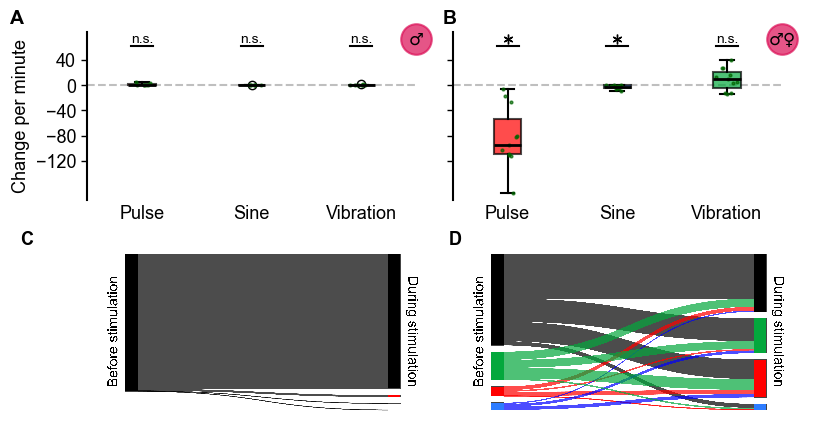

In [125]:
if report_plots:

    # Create a new figure 
    fig, ax = plt.subplots(2, 2, figsize=(8,4.2), constrained_layout=False)
    ax = ax.flatten()

    # Add horizontal lines at zero for reference
    [ ax.hlines(0, 0.5, 3.5, 'gray', alpha=0.5, linestyles="dashed") for ax in ax[:2] ] 
    # Plot the boxplots
    myplt.boxplot_dp(np.vstack([p_diff_global, s_diff_global, v_diff_global]).T, labels=["Pulse", "Sine", "Vibration"], 
                    markercolor="darkgreen", boxcolor=[pulse_col,sine_col,vib_col], markeralpha=0.7, markersize=2, ax=ax[0])

    myplt.boxplot_dp(np.vstack([p_diff_global_mf, s_diff_global_mf, v_diff_global_mf]).T, labels=["Pulse", "Sine", "Vibration"], 
                    markercolor="darkgreen", boxcolor=[pulse_col,sine_col,vib_col], markeralpha=0.7, markersize=2, ax=ax[1])

    # Label the plots
    ax[0].set_ylabel("Change per minute")
    ax[1].set_yticklabels([])
    ax[0].set_title("A", x=-0.22, y=1.0, fontsize=14)       # -0.19
    ax[1].set_title("B", x=-0.03, y=1.0, fontsize=14)

    # Make the ylimits equal
    myplt.equal_axlims(ax[:2])

    ax[0].set_yticks(yticks_glob_changes)
    ax[1].set_yticks(yticks_glob_changes)
    ax[0].set_xlim((0.5,3.7))
    ax[1].set_xlim((0.5,3.7))

    ax[0].spines["bottom"].set_visible(False)
    ax[1].spines["bottom"].set_visible(False)
    ax[0].tick_params(axis="x", length=0.0)
    ax[1].tick_params(axis="x", length=0.0)

    # Get useful values for the y position of the pictograms 
    old_ylim = ax[0].get_ylim()
    y_pictogr = old_ylim[-1] + np.diff(old_ylim) * 0.1

    # Add significance stars 
    myplt.add_significance_stars(ax[0], effects[:3], [1,2,3])
    myplt.add_significance_stars(ax[1], effects[3:], [1,2,3])

    myplt.add_condition_pictogram(ax[0], "m", x=3.5, y=y_pictogr)
    myplt.add_condition_pictogram(ax[1], "mf", x=3.5, y=y_pictogr)


    # Load sankey plot as image
    sankey_mf = convert_from_path(f"../figures_wip/{exp_grp}/{exp_grp}_mf_sandkey_temp.pdf")
    sankey_m = convert_from_path(f"../figures_wip/{exp_grp}/{exp_grp}_m_sandkey_temp.pdf")

    
    # Plot the images of the sankey diagrams
    ax[2].imshow(sankey_m[0], interpolation="none")
    ax[3].imshow(sankey_mf[0], interpolation="none")

    # Label the plots
    ax[2].set_title("C", x=-0.27)       # -0.24
    ax[3].set_title("D", x=-0.07)
    
    # Adjust the axes limits
    ax[2].set_xlim((-0.5, 3126))
    ax[3].set_xlim((-0.5, 3126))
    ax[2].set_ylim((1665, -0.5))
    ax[3].set_ylim((1665, -0.5))

    # Turn of the axes (no spines)
    ax[2].axis("off")
    ax[3].axis("off")

    # Adjust subplot grid
    plt.subplots_adjust(wspace=0.1, hspace=0.3, left=0.1, top=0.94, right=0.99, bottom=0.01)

    # Save the figure
    fig.savefig(f"../figures_wip/{exp_grp}/{exp_grp}_glob_changes_sankeys.pdf")

##### Combined plot for the male-female condition of vPR13 and vMS12-SS3

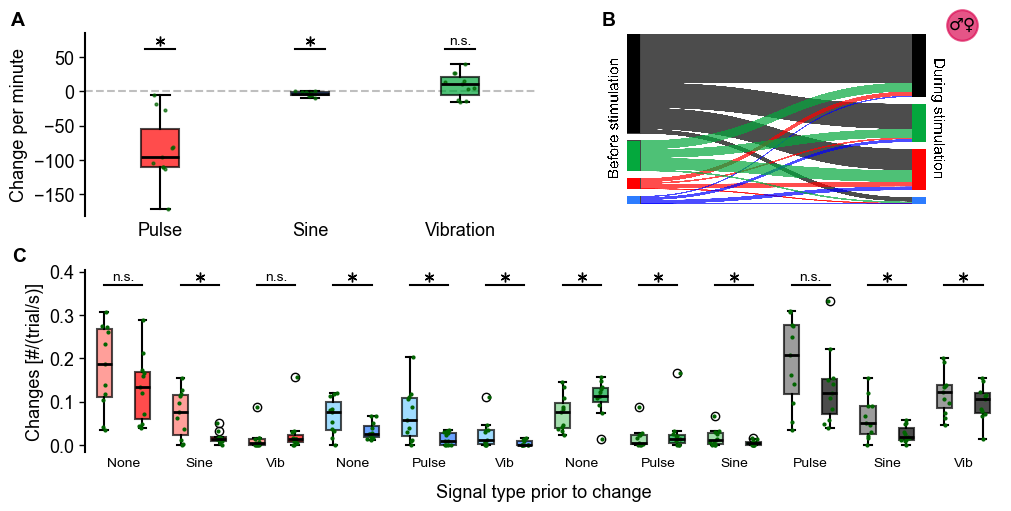

In [131]:
if report_plots:
    # Load sankey plot as image
    sankey_mf = convert_from_path(f"../figures_wip/{exp_grp}/{exp_grp}_mf_sandkey_temp.pdf")

    # Create tiled layout with specific arrangement
    fig, ax_dict = plt.subplot_mosaic([["A", "A", "A", "B", "B", "B"], 
                                    ["C", "C", "C", "C", "C", "C"]], figsize=(10,5), constrained_layout=False)
    axa = ax_dict["A"]
    axb = ax_dict["B"]
    axc = ax_dict["C"]

    # Add horizontal lines at zero for reference
    axa.hlines(0, 0.5, 3.5, 'gray', alpha=0.5, linestyles="dashed")
    # Plot the boxplot
    myplt.boxplot_dp(np.vstack([p_diff_global_mf, s_diff_global_mf, v_diff_global_mf]).T, labels=["Pulse", "Sine", "Vibration"], 
                    markercolor="darkgreen", boxcolor=[pulse_col,sine_col,vib_col], markeralpha=0.7, markersize=2, ax=axa)
    axa.set_yticks(yticks_glob_changes)
    
    axb.imshow(sankey_mf[0], interpolation="none")

    # Label the plots
    axa.set_ylabel("Change per minute")
    axa.set_title("A", x=-0.165, fontsize=14)
    axb.set_title("B", x=-0.01, y=1.0, fontsize=14)
    axc.set_title("C", x=-0.08, fontsize=14)

    # Add significance stars 
    myplt.add_significance_stars(axa, effects[3:], [1,2,3])
    # Add condition pictograms 
    myplt.add_condition_pictogram(axb, "mf", x=3250, y=-80)

    # Set bottom spine invisible
    axa.spines["bottom"].set_visible(False)
    axa.tick_params(axis="x", length=0.0)

    # Turn off axes for B panel and set y limits
    axb.axis("off")
    axb.set_ylim((1665, -0.5))
    axb.set_xlim((-0.5, 3126))

    # Plot the change counts as boxplots
    myplt.boxplot_dp(cnt_chg_combi_srt_mf, ax=axc, markersize=2, boxcolor=colors_order, markercolor="darkgreen", boxwidth=0.4)
    myplt.add_significance_stars(axc, effects_all_chgs_mf.tolist(), xtick_vals, width=1)

    # Add alibi-dots 
    # axc.plot(1, 0, color=pulse_col, label="Pulse", linewidth=4)
    # axc.plot(1, 0, color=sine_col, label="Sine", linewidth=4)
    # axc.plot(1, 0, color=vib_col, label="Vibration", linewidth=4)
    # axc.plot(1, 0, color="black", label="None", linewidth=4)

    # Label the plot
    axc.set_ylabel("Changes [#/(trial/s)]")
    axc.set_xlabel("Signal type prior to change", labelpad=10)
    axc.set_xticks(xtick_vals, xtick_labels, fontsize=10)
    # Add a legend 
    # axc.legend(title="Signal type \nafter change", alignment="left", loc='upper right', bbox_to_anchor=(1.15, 1))

    # Remove bottom spine
    axc.spines["bottom"].set_visible(False)
    axc.tick_params(axis="x", length=0.0)

    # Adjust subplot grid
    plt.subplots_adjust(wspace=0.2, hspace=0.3, left=0.08, right=0.99, top=0.94, bottom=0.1)

    # Save
    fig.savefig(f"../figures_wip/{exp_grp}/{exp_grp}_glob_sankey_all_chgs.pdf")

##### Changes in signal amounts per stimulus intensity for each animal

In [ ]:
fig6, ax6 = plt.subplots(1, 3, figsize=(10,4))
ax6 = ax6.flatten()

# Plot lines at zero for reference
[ ax.hlines(0, 5, 320, 'gray', alpha=0.5, linestyles="dashed") for ax in ax6 ] 
# Plot the responses (connected per individuum)
ax6[0].semilogx(opto_calib[:,1], np.vstack(p_counts_grp_mf), marker="o", markersize=2, alpha=1)
ax6[0].semilogx(opto_calib[:,1], np.median(np.vstack(p_counts_grp_mf), axis=1), marker="o", markersize=4, alpha=1, color="k", linewidth=3)
ax6[1].semilogx(opto_calib[:,1], np.vstack(sine_counts_grp_mf), marker="o", markersize=2, alpha=1)
ax6[1].semilogx(opto_calib[:,1], np.median(np.vstack(sine_counts_grp_mf), axis=1), marker="o", markersize=4, alpha=1, color="k", linewidth=3)
ax6[2].semilogx(opto_calib[:,1], np.vstack(vib_counts_grp_mf), marker="o", markersize=2, alpha=1)
ax6[2].semilogx(opto_calib[:,1], np.median(np.vstack(vib_counts_grp_mf), axis=1), marker="o", markersize=4, alpha=1, color="k", linewidth=3)

# Set x limits
ax6[0].set_xlim([5,320])
ax6[1].set_xlim([5,320])
ax6[2].set_xlim([5,320])

# Align the zeros on the y axis
myplt.align_zeros(ax6)

# Label the plots
ax6[0].set_ylabel("Change in \npulses/minute")
ax6[1].set_ylabel("Change in \nseconds sine/minute")
ax6[2].set_ylabel("Change in \nvibrations/minute")
ax6[1].set_xlabel(r"Light intensity [µW/mm$^2$] (log scaled)")
ax6[0].tick_params(axis='x', labelrotation = 90)
ax6[1].tick_params(axis='x', labelrotation = 90)
ax6[2].tick_params(axis='x', labelrotation = 90)

# Save the plot
fig6.savefig(f"../figures_wip/{exp_grp}/{exp_grp}_mf_changes_lines.pdf")


fig7, ax7 = plt.subplots(1, 3, figsize=(10,4))
ax7 = ax7.flatten()

# Plot lines at zero for reference
[ ax.hlines(0, 5, 320, 'gray', alpha=0.5, linestyles="dashed") for ax in ax7 ] 
# Plot the responses (connected per individuum)
ax7[0].semilogx(opto_calib[:,1], np.vstack(p_counts_grp), marker="o", markersize=2, alpha=1)
ax7[0].semilogx(opto_calib[:,1], np.median(np.vstack(p_counts_grp), axis=1), marker="o", markersize=4, alpha=1, color="k", linewidth=3)
ax7[1].semilogx(opto_calib[:,1], np.vstack(sine_counts_grp), marker="o", markersize=2, alpha=1)
ax7[1].semilogx(opto_calib[:,1], np.median(np.vstack(sine_counts_grp), axis=1), marker="o", markersize=4, alpha=1, color="k", linewidth=3)
ax7[2].semilogx(opto_calib[:,1], np.vstack(vib_counts_grp), marker="o", markersize=2, alpha=1)
ax7[2].semilogx(opto_calib[:,1], np.median(np.vstack(vib_counts_grp), axis=1), marker="o", markersize=4, alpha=1, color="k", linewidth=3)

# Set x limits
ax7[0].set_xlim([5,320])
ax7[1].set_xlim([5,320])
ax7[2].set_xlim([5,320])

# Align the zeros on the y axis
myplt.align_zeros(ax7)

# Label the plots
ax7[0].set_ylabel("Change in \npulses/minute")
ax7[1].set_ylabel("Change in \nseconds sine/minute")
ax7[2].set_ylabel("Change in \nvibrations/minute")
ax7[1].set_xlabel(r"Light intensity [µW/mm$^2$] (log scaled)")
ax7[0].tick_params(axis='x', labelrotation = 90)
ax7[1].tick_params(axis='x', labelrotation = 90)
ax7[2].tick_params(axis='x', labelrotation = 90)

# Save the plot
# fig7.savefig(f"../figures_wip/{exp_grp}/{exp_grp}_m_changes_lines.pdf")

## Plots for presentations

In [ ]:
if presentation_plots:
    # Create a new figure
    fig8, ax8 = plt.subplots(1, 1, figsize=(12,4))

    # Plot the change counts as boxplots
    myplt.boxplot_dp(cnt_chg_combi_srt, ax=ax8, markersize=2, boxcolor=colors_order, markercolor="darkgreen")
    myplt.add_significance_stars(ax8, effects_all_chgs_mf.tolist(), xtick_vals, width=1)

    # Add alibi-dots 
    ax8.plot(1, 0, color=pulse_col, label="Pulse", linewidth=4)
    ax8.plot(1, 0, color=sine_col, label="Sine", linewidth=4)
    ax8.plot(1, 0, color=vib_col, label="Vibration", linewidth=4)
    ax8.plot(1, 0, color="black", label="None", linewidth=4)

    # Label the plot
    ax8.set_ylabel("Changes [#/(trial/s)]")
    ax8.set_xlabel("Signal type prior to change", labelpad=10)
    ax8.set_xticks(xtick_vals, xtick_labels, fontsize=10)
    # Add a legend 
    ax8.legend(title="Signal type \nafter change", alignment="left", loc='upper right', bbox_to_anchor=(1.15, 1))

    # Remove bottom spine
    ax8.spines["bottom"].set_visible(False)
    ax8.tick_params(axis="x", length=0.0)

    # Add condition pictogram 
    ax8.set_xlim((0.5, 25.5))
    myplt.add_condition_pictogram(ax8, "mf", x=25, y=0.42)

    fig8.savefig(f"../figures_wip/{exp_grp}/{exp_grp}_mf_sig_changes.pdf")

In [ ]:
if presentation_plots:
    # Create tiled layout with specific arrangement
    fig, ax = plt.subplots(2, 1, figsize=(12,5))
    ax = ax.flatten()

    ## PSTH
    # Plot the PSTH plots
    myplt.psth_plot(time_vec, [hist_p_mf,hist_s_mf,hist_v_mf], [pulse_col, sine_col, vib_col], 
                    ['Pulse','Sine','Vibration'], ax=ax[1], stim_bar=False, 
                    legend_off=True, stim_period=[0,stim_len])
    myplt.psth_plot(time_vec, [hist_p,hist_s,hist_v], [pulse_col, sine_col, vib_col], 
                    ['Pulse','Sine','Vibration'], ax=ax[0], stim_period=[0,stim_len])
    myplt.equal_axlims(ax)

    # Label plots
    ax[1].set_xlabel('time [s]')
    ax[0].set_ylabel('probability')
    ax[1].set_ylabel('probability')
    ax[0].set_title(f'solitary male (n = {number_exp})', y=1.1)
    ax[1].set_title(f'male + female (n = {number_mf_exp})', y=1.1)

    fig.savefig(f"../figures_wip/{exp_grp}/presi_{exp_grp}_psth.png")


    # ## Boxplots (male)
    fig, ax = plt.subplots(1, 3, figsize=(12,5))
    ax = ax.flatten()
    # Add horizontal lines at zero for reference
    [ a.hlines(0, 0.5, 6.5, color='gray', alpha=0.5, linestyles="dashed") for a in ax ] 
    # Plot the boxplots
    myplt.boxplot_dp(p_counts_grp.T, labels=opto_calib[:,1].tolist(), markercolor="darkgreen", boxcolor=pulse_col, markeralpha=0.7, markersize=2, ax=ax[0])
    myplt.boxplot_dp(sine_counts_grp.T, labels=opto_calib[:,1].tolist(), markercolor="darkgreen", boxcolor=sine_col, markeralpha=0.7, markersize=2, ax=ax[1])
    myplt.boxplot_dp(vib_counts_grp.T, labels=opto_calib[:,1].tolist(), markercolor="darkgreen", boxcolor=vib_col, markeralpha=0.7, markersize=2, ax=ax[2])

    # Label the plots
    ax[0].set_ylabel("Change in \npulses/minute")
    ax[1].set_ylabel("Change in \nseconds sine/minute")
    ax[2].set_ylabel("Change in \nvibrations/minute")
    ax[1].set_xlabel(r"Light intensity [µW/mm$^2$]")
    ax[0].tick_params(axis='x', labelrotation = 90)
    ax[1].tick_params(axis='x', labelrotation = 90)
    ax[2].tick_params(axis='x', labelrotation = 90)
    ax[1].set_title(f'solitary male (n = {number_exp})')

    fig.savefig(f"../figures_wip/{exp_grp}/presi_{exp_grp}_bxplt_m.png")


    ## Boxplots plots (male female)
    fig, ax = plt.subplots(1, 3, figsize=(12,5))
    ax = ax.flatten()

    # Add horizontal lines at zero for reference
    [ a.hlines(0, 0.5, 6.5, 'gray', alpha=0.5, linestyles="dashed") for a in ax ] 
    # Plot the boxplots
    myplt.boxplot_dp(p_counts_grp_mf.T, labels=opto_calib[:,1].tolist(), markercolor="darkgreen", boxcolor=pulse_col, markeralpha=0.7, markersize=2, ax=ax[0])
    myplt.boxplot_dp(sine_counts_grp_mf.T, labels=opto_calib[:,1].tolist(), markercolor="darkgreen", boxcolor=sine_col, markeralpha=0.7, markersize=2, ax=ax[1])
    myplt.boxplot_dp(vib_counts_grp_mf.T, labels=opto_calib[:,1].tolist(), markercolor="darkgreen", boxcolor=vib_col, markeralpha=0.7, markersize=2, ax=ax[2])

    # Align all 0 on the y axes
    myplt.align_zeros(ax)

    # Label the axes
    ax[0].set_ylabel("Change in \npulses/minute")
    ax[1].set_ylabel("Change in \nseconds sine/minute")
    ax[2].set_ylabel("Change in \nvibrations/minute")
    ax[1].set_xlabel(r"Light intensity [µW/mm$^2$]")
    ax[0].tick_params(axis='x', labelrotation = 90)
    ax[1].tick_params(axis='x', labelrotation = 90)
    ax[2].tick_params(axis='x', labelrotation = 90)

    ax[1].set_title(f'male + female (n = {number_mf_exp})')

    fig.savefig(f"../figures_wip/{exp_grp}/presi_{exp_grp}_bxplt_mf.png")


    # ## Raster plots
    fig, ax = plt.subplots(2, 1, figsize=(12,5))
    ax = ax.flatten()

    # Create raster plots
    myplt.raster_plot([r_mat_s,r_mat_p,r_mat_v], time_vec, stim_volts, labels=['Sine','Pulse','Vibrations'], 
                      colors=[sine_col,pulse_col,vib_col], ax=ax[0], legend_off=True, 
                      stim_watts=opto_calib[:,1],stim_bar=True, stim_period=[0,stim_len], alpha=0.7)
    myplt.raster_plot([r_mat_s_mf,r_mat_p_mf,r_mat_v_mf], time_vec, stim_volts_mf, labels=['Sine','Pulse','Vibrations'], 
                      colors=[sine_col,pulse_col,vib_col], ax=ax[1], legend_off=True, 
                      stim_watts=opto_calib[:,1], stim_period=[0,stim_len], alpha=0.7)

    # Label axes
    ax[1].set_xlabel('time [s]')
    ax[0].set_ylabel(r"Light intensity" + "\n" + r"[µW/mm$^2$]")
    ax[1].set_ylabel(r"Light intensity" + "\n" + r"[µW/mm$^2$]")
    ax[0].set_title(f'solitary male (n = {number_exp})', y=1.1)
    ax[1].set_title(f'male + female (n = {number_mf_exp})', y=1.1)

    # Save figure
    fig.savefig(f"../figures_wip/{exp_grp}/presi_{exp_grp}_raster.png")

In [ ]:
if presentation_plots:
    # Create a plotly figure with subplots (two sankeys one xy plot type)
    fig = make_subplots(rows=1, cols=3, subplot_titles=[f'solitary male (n = {number_exp})', f'male+female (n = {number_mf_exp})'],
                        specs=[[{"type":"sankey"}, {"type":"sankey"}, {"type":"xy"}]], column_widths=[0.495,0.495,0.01])

    # Append the solitary male sankey digram to axis 0
    fig.append_trace(go.Sankey(
        node = dict(
          pad = 10,
          thickness = 20,
          color = col_sankey_boxes
        ),
        link = dict(
          source = poss_evt_chgs[:, 0],
          target = poss_evt_chgs[:, 1],
          value = evt_change_cnt,
          color = col_sankey_links
        )), row=1, col=1)
    # Append the male-female sankey diagram to axis 1
    fig.append_trace(go.Sankey(
        node = dict(
          pad = 10,
          thickness = 20,
          color = col_sankey_boxes_mf
        ),
        link = dict(
          source = poss_evt_chgs_mf[:, 0],
          target = poss_evt_chgs_mf[:, 1],
          value = evt_change_cnt_mf,
          color = col_sankey_links_mf
        )), row=1, col=2)

    # Annotate the plots with "Before stimulation" on the left and "During stimulation" on the right
    fig.add_annotation(x=-0.03, y=0.5,
                text="Before stimulation",
                showarrow=False,
                align = "center",
                textangle=-90,
                font=dict(size=15, family="Arial", color="black"), xref="paper")

    fig.add_annotation(x=0.48, y=0.5,
                text="Before stimulation",
                showarrow=False,
                align = "center",
                textangle=-90,
                font=dict(size=15, family="Arial", color="black"), xref="paper")

    fig.add_annotation(x=0.45, y=0.5,
                text="During stimulation",
                showarrow=False,
                align = "center",
                textangle=90,
                font=dict(size=15, family="Arial", color="black"), xref="paper")

    fig.add_annotation(x=0.96, y=0.5,
                text="During stimulation",
                showarrow=False,
                align = "center",
                textangle=90,
                font=dict(size=15, family="Arial", color="black"), xref="paper")

    # Make a list of colors and the associated legend label
    legend_entries = [["rgba(0,0,0,1)", "None"], ["rgb(1.0, 0.0, 0.0)", "Pulse"], 
                      ["rgb(0.17647058823529413, 0.48627450980392156, 1.0)", "Sine"], ["rgb(0.2745098 , 0.65882353, 0.12156863)", "Vibration"]]

    # Add fake data points to the right-most subplot to create a legend
    for entry in legend_entries:
        fig.append_trace(go.Scatter(
                mode="markers",
                x=[None],
                y=[None],
                marker=dict(size=10, color=entry[0], symbol="square"),
                name=entry[1],
            ), row=1, col=3)
    # Remove the axes on the rightmost plot
    fig.update_xaxes(visible=False)
    fig.update_yaxes(visible=False)

    # Adjust the layout and show the figure
    fig.update_layout(height=300, width=1000, margin=dict(t=25, b=10, r=45, l=45), plot_bgcolor="rgba(0,0,0,0)", font_size=14)
    fig.show()

    # Save the figure
    fig.write_image(f"../figures_wip/{exp_grp}/presi_{exp_grp}_sandkey.png")

## Plot overviews 

In [ ]:
if overviews:
    # Create tiled layout with specific arrangement
    fig, ax_dict = plt.subplot_mosaic([["A1", "A1", "A1", "A1", "B1", "B1", "B1"], 
                                    ["A2", "A2", "A2", "A2","B2", "B2", "B2"], 
                                    ["C1", "C2", "C3",".", "D1", "D2", "D3"]], figsize=(16,7))

    ## PSTH
    # Get the axes handles
    ax_a1 = ax_dict["A1"]
    ax_a2 = ax_dict["A2"]
    # Plot the PSTH plots
    myplt.psth_plot(time_vec, [hist_p,hist_s,hist_v], [pulse_col, sine_col, vib_col], 
                    ['Pulse','Sine','Vibration'], ax=ax_a1, stim_period=[0,stim_len])
    myplt.psth_plot(time_vec, [hist_p_mf,hist_s_mf,hist_v_mf], [pulse_col, sine_col, vib_col], 
                    ['Pulse','Sine','Vibration'], ax=ax_a2, stim_bar=False, legend_off=True, 
                    stim_period=[0,stim_len])

    # Label plots
    ax_a2.set_xlabel('time [s]')
    ax_a2.set_ylabel('probability')
    ax_a1.set_ylabel('probability')
    ax_a1.set_title(f'solitary male (n = {number_exp})', y=1.1)
    ax_a2.set_title(f'male + female (n = {number_mf_exp})')

    ## Boxplots (male)
    # Get axes handles for C panel
    ax_c1 = ax_dict["C1"]
    ax_c2 = ax_dict["C2"]
    ax_c3 = ax_dict["C3"]
    # Add horizontal lines at zero for reference
    [ ax.hlines(0, 0.5, 6.5, color='gray', alpha=0.5, linestyles="dashed") for ax in [ax_c1,ax_c2,ax_c3] ] 
    # Plot the boxplots
    myplt.boxplot_dp(p_counts_grp.T, labels=opto_calib[:,1].tolist(), markercolor="darkgreen", 
                     boxcolor=pulse_col, markeralpha=0.7, markersize=2, ax=ax_c1)
    myplt.boxplot_dp(sine_counts_grp.T, labels=opto_calib[:,1].tolist(), markercolor="darkgreen", 
                     boxcolor=sine_col, markeralpha=0.7, markersize=2, ax=ax_c2)
    myplt.boxplot_dp(vib_counts_grp.T, labels=opto_calib[:,1].tolist(), markercolor="darkgreen", 
                     boxcolor=vib_col, markeralpha=0.7, markersize=2, ax=ax_c3)

    # Label the plots
    ax_c1.set_ylabel("Change in \npulses/minute")
    ax_c2.set_ylabel("Change in \nseconds sine/minute")
    ax_c3.set_ylabel("Change in \nvibrations/minute")
    ax_c2.set_xlabel(r"Light intensity" + "\n" + r"[µW/mm$^2$]")
    ax_c1.tick_params(axis='x', labelrotation = 90)
    ax_c2.tick_params(axis='x', labelrotation = 90)
    ax_c3.tick_params(axis='x', labelrotation = 90)
    ax_c2.set_title("solitary male")

    ## Boxplots plots (male female)
    # Get the axes handles
    ax_d1 = ax_dict["D1"]
    ax_d2 = ax_dict["D2"]
    ax_d3 = ax_dict["D3"]
    # Add horizontal lines at zero for reference
    [ ax.hlines(0, 0.5, 6.5, 'gray', alpha=0.5, linestyles="dashed") for ax in [ax_d1,ax_d2,ax_d3] ] 
    # Plot the boxplots
    myplt.boxplot_dp(p_counts_grp_mf.T, labels=opto_calib[:,1].tolist(), markercolor="darkgreen", 
                     boxcolor=pulse_col, markeralpha=0.7, markersize=2, ax=ax_d1)
    myplt.boxplot_dp(sine_counts_grp_mf.T, labels=opto_calib[:,1].tolist(), markercolor="darkgreen", 
                     boxcolor=sine_col, markeralpha=0.7, markersize=2, ax=ax_d2)
    myplt.boxplot_dp(vib_counts_grp_mf.T, labels=opto_calib[:,1].tolist(), markercolor="darkgreen", 
                     boxcolor=vib_col, markeralpha=0.7, markersize=2, ax=ax_d3)

    # Align all 0 on the y axes
    myplt.align_zeros([ax_c1,ax_c2,ax_c3,ax_d1,ax_d2,ax_d3])

    # Label the axes
    ax_d1.set_ylabel("Change in \npulses/minute")
    ax_d2.set_ylabel("Change in \nseconds sine/minute")
    ax_d3.set_ylabel("Change in \nvibrations/minute")
    ax_d2.set_xlabel(r"Light intensity" + "\n" + r"[µW/mm$^2$]")
    ax_d1.tick_params(axis='x', labelrotation = 90)
    ax_d2.tick_params(axis='x', labelrotation = 90)
    ax_d3.tick_params(axis='x', labelrotation = 90)

    ax_d2.set_title("male + female")

    ## Raster plots
    # Get axes handles
    ax_b1 = ax_dict["B1"]
    ax_b2 = ax_dict["B2"]
    # Create raster plots
    myplt.raster_plot([r_mat_s, r_mat_p, r_mat_v], time_vec, stim_volts, labels=['Sine','Pulse','Vibrations'], 
                    colors=[sine_col, pulse_col, vib_col], ax=ax_b1, legend_off=True, stim_watts=opto_calib[:,1],
                    stim_bar=True, stim_period=[0,stim_len], alpha=0.7)
    myplt.raster_plot([r_mat_s_mf, r_mat_p_mf, r_mat_v_mf], time_vec, stim_volts_mf, labels=['Sine','Pulse','Vibrations'], 
                    colors=[sine_col, pulse_col, vib_col], ax=ax_b2, legend_off=True, stim_watts=opto_calib[:,1], 
                    stim_period=[0,stim_len], alpha=0.7)

    # Label axes
    ax_b2.set_xlabel('time [s]')
    ax_b2.set_ylabel(r"Light intensity" + "\n" + r"[µW/mm$^2$]")
    ax_b1.set_ylabel(r"Light intensity" + "\n" + r"[µW/mm$^2$]")
    ax_b1.set_title("solitary male", y=1.08)
    ax_b2.set_title("male + female")

    # Save figure
    fig.savefig(f"../figures_wip/{exp_grp}/{exp_grp}_full_overview.pdf")

In [ ]:
if overviews:
    # Create tiled layout with specific arrangement
    fig2, ax_dict = plt.subplot_mosaic([["A1", "A1", "A1", "A1", ".", ".", "."],
                                    ["A1", "A1", "A1", "A1", "B1", "B2", "B3"], 
                                    ["C1", "C1", "C1", "C1", "B1", "B2", "B3"],
                                    ["C1", "C1", "C1", "C1", "B1", "B2", "B3"]], figsize=(13,4))

    ## PSTH
    # Get the axes handles
    ax_a1 = ax_dict["A1"]
    # Plot the PSTH plots
    myplt.psth_plot(time_vec, [hist_p_mf,hist_s_mf,hist_v_mf], [pulse_col, sine_col, vib_col], 
                    ['Pulse','Sine','Vibration'], ax=ax_a1, stim_bar=True, legend_off=True, 
                    stim_period=[0,stim_len])
    ax_a1.set_xticklabels([])

    # Label plots
    ax_a1.set_ylabel('probability')
    ax_a1.set_title(f'male + female (n = {number_mf_exp})', y=1.1)

    ## Boxplots (male female)
    # Get axes handles for C panel
    ax_b1 = ax_dict["B1"]
    ax_b2 = ax_dict["B2"]
    ax_b3 = ax_dict["B3"]
    # Add horizontal lines at zero for reference
    [ ax.hlines(0, 0.5, 6.5, 'gray', alpha=0.5, linestyles="dashed") for ax in [ax_b1,ax_b2,ax_b3] ] 
    # Plot the boxplots
    myplt.boxplot_dp(p_counts_grp_mf.T, labels=opto_calib[:,1].tolist(), markercolor="darkgreen", 
                    boxcolor=pulse_col, markeralpha=0.7, markersize=2, ax=ax_b1)
    myplt.boxplot_dp(sine_counts_grp_mf.T, labels=opto_calib[:,1].tolist(), markercolor="darkgreen", 
                    boxcolor=sine_col, markeralpha=0.7, markersize=2, ax=ax_b2)
    myplt.boxplot_dp(vib_counts_grp_mf.T, labels=opto_calib[:,1].tolist(), markercolor="darkgreen", 
                    boxcolor=vib_col, markeralpha=0.7, markersize=2, ax=ax_b3)

    # Label the plots
    ax_b1.set_ylabel("Change in \npulses/minute")
    ax_b2.set_ylabel("Change in \nseconds sine/minute")
    ax_b3.set_ylabel("Change in \nvibrations/minute")
    ax_b2.set_xlabel(r"Light intensity [µW/mm$^2$]")
    ax_b1.tick_params(axis='x', labelrotation = 90)
    ax_b2.tick_params(axis='x', labelrotation = 90)
    ax_b3.tick_params(axis='x', labelrotation = 90)


    # Align all 0 on the y axes
    myplt.align_zeros([ax_b1,ax_b2,ax_b3])

    ## Raster plots
    # Get axes handles
    ax_c1 = ax_dict["C1"]
    # Create raster plots
    myplt.raster_plot([r_mat_s_mf, r_mat_p_mf, r_mat_v_mf], time_vec, stim_volts_mf, labels=['Sine','Pulse','Vibrations'], 
                    colors=[sine_col,pulse_col,vib_col], ax=ax_c1, legend_off=True, stim_watts=opto_calib[:,1], 
                    stim_period=[0,stim_len], alpha=0.7)

    # Label axes
    ax_c1.set_ylabel(r"Light intensity" + "\n" + r"[µW/mm$^2$]")
    ax_c1.set_xlabel("time [ms]")

    # Save figure
    fig2.savefig(f"../figures_wip/{exp_grp}/{exp_grp}_reduced_overview.pdf")